In [2]:
from vacation.model import VCNN
from vacation.data import GalaxyDataset
import numpy as np
import torch

import matplotlib.pyplot as plt

rng = np.random.default_rng(1337)

In [4]:
train_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_train.h5",
    device="cuda:1",
    max_cache_size="15G",
    cache_loaded=True,
    index_collection=rng.integers(0, 16813, 10000),
)

Plotting images:   0%|          | 0/10 [00:00<?, ?it/s]

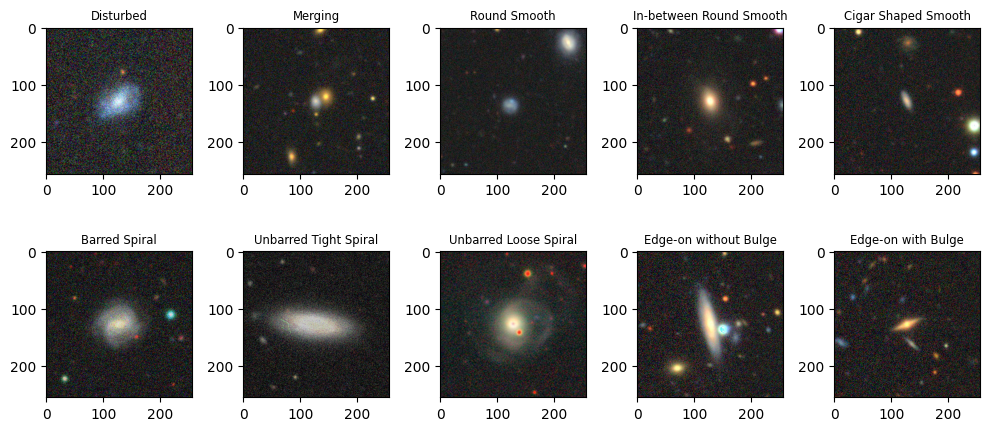

In [6]:
train_ds.plot_examples()

In [3]:
valid_ds = GalaxyDataset(
    path="/scratch/tgross/vacation_data/Galaxy10_DECals_valid.h5",
    device="cuda:1",
    max_cache_size="4G",
    cache_loaded=True,
    index_collection=rng.integers(0, 4204, 400),
)

In [4]:
for i in range(0, 100):
    train_ds[i]

In [6]:
torch.cuda.empty_cache()

In [ ]:
valid_ds.plot_distribution()

In [ ]:
str(model._loss_func.__class__.__name__)

In [ ]:
getattr(torch.nn, model._activation_func.__name__)

In [ ]:
model = VCNN.load(
    path=".models/model_full_v2_2.pt",
    optimizer=torch.optim.AdamW,
    activation_func=torch.nn.PReLU,
    loss_func=torch.nn.CrossEntropyLoss,
    relative_to_package=True,
)

In [ ]:
plt.plot(model._loss_metric.train_vals, label="Train")
plt.plot(model._loss_metric.valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
plt.plot(model._metrics["accuracy"].train_vals, label="Train")
plt.plot(model._metrics["accuracy"].valid_vals, label="Valid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from tqdm.auto import tqdm

In [ ]:
model.model.eval()
y_pred = torch.Tensor(
    [model(valid_ds[int(img)][0][None]).argmax() for img in tqdm(np.arange(0, 400))]
)

In [ ]:
cmatrix = ConfusionMatrixDisplay.from_predictions(
    y_pred=y_pred.cpu().numpy(), y_true=valid_ds.get_labels().cpu().numpy()
)

In [ ]:
print(str(model.model))

In [ ]:
print(str(model.model))